In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv('/home/dennis/data/predictive_maintenance/pump_data.csv', sep=';', low_memory=False , decimal=',')

In [44]:
df.head()

,Unnamed: 0,Date,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
0,0,01.01.19 00:00,"890,187","77,923","3,025","3,043","3,055",No Data,"40,456","97,602",...,"0,156","16,62","16,661","13,997","358,322",100,"362,52",100,"392,51",100
1,1,01.01.19 00:10,"890,262","77,893","3,024","3,043","3,053",No Data,"40,415","97,178",...,"0,157","16,675","16,676","13,985","358,897",100,"362,505",100,"393,009",100
2,2,01.01.19 00:20,"890,337","77,863","3,024","3,043","3,051",No Data,"40,375","97,215",...,"0,158","16,711","16,726","14,02","358,984",100,"362,305",100,"392,767",100
3,3,01.01.19 00:30,"890,294","77,833","3,023","3,043","3,051",No Data,"40,41","97,602",...,"0,159","16,716","16,784","14,035","362,205",100,"361,171",100,"391,512",100
4,4,01.01.19 00:40,"890,239","77,823","3,023","3,043","3,052",No Data,"40,41","97,438",...,"0,16","16,75","16,815","14,065","361,954",100,"360,852",100,"390,736",100


In [45]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [46]:
df = df.replace(to_replace='N_LAUF', value='0')
df = df.replace(to_replace='LAUF', value='1')
df = df.replace(to_replace='No Data', value='-1001')
df = df.replace(to_replace='Over Range', value='-1002')
df = df.replace(to_replace='I/O Timeout', value='-1003')
df = df.replace(to_replace='Calc Failed', value='-1004')
df = df.replace(to_replace='Error', value='-1005')
df = df.replace(to_replace='Configure', value='-1006')
df = df.replace(to_replace='Scan Off', value='-1007')
df = df.replace(to_replace='Comm Fail', value='-1008')
df = df.replace(to_replace='Shutdown', value='-1009')
df = df.replace(to_replace='NaN', value='-1010')
df = df.replace(to_replace='Bad Input', value='-1011')
df = df.replace(to_replace='Bad', value='-1012')

In [47]:
df_2009 = df[df['Date'].str.contains("2009")]
df_2010 = df[df['Date'].str.contains("2010")]
df_2011 = df[df['Date'].str.contains("2011")]
df_2012 = df[df['Date'].str.contains("2012")]
df_2013 = df[df['Date'].str.contains("2013")]
df_2014 = df[df['Date'].str.contains("2014")]
df_2015 = df[df['Date'].str.contains("2015")]
df_2016 = df[df['Date'].str.contains("2016")]
df_2017 = df[df['Date'].str.contains("2017")]
df_2018 = df[df['Date'].str.contains("2018")]
df_2019 = df[df['Date'].str.contains(".19")]

In [48]:
df_2019.shape
df.shape

(574005, 54)

In [49]:
df = df.replace(',','.', regex=True)

### TODO Visualization

In [50]:
df.head()

,Date,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
0,01.01.19 00:00,890.187,77.923,3.025,3.043,3.055,-1001,40.456,97.602,120.306,...,0.156,16.62,16.661,13.997,358.322,100,362.52,100,392.51,100
1,01.01.19 00:10,890.262,77.893,3.024,3.043,3.053,-1001,40.415,97.178,120.12,...,0.157,16.675,16.676,13.985,358.897,100,362.505,100,393.009,100
2,01.01.19 00:20,890.337,77.863,3.024,3.043,3.051,-1001,40.375,97.215,120.027,...,0.158,16.711,16.726,14.02,358.984,100,362.305,100,392.767,100
3,01.01.19 00:30,890.294,77.833,3.023,3.043,3.051,-1001,40.41,97.602,120.114,...,0.159,16.716,16.784,14.035,362.205,100,361.171,100,391.512,100
4,01.01.19 00:40,890.239,77.823,3.023,3.043,3.052,-1001,40.41,97.438,120.135,...,0.16,16.75,16.815,14.065,361.954,100,360.852,100,390.736,100


In [51]:
df = df.drop(['Date'], axis = 1)
df = df.drop(['03:FV3195'], axis = 1)
df = df.drop(['03:FV3197'], axis = 1)
df = df.drop(['03:FV3199'], axis = 1)

In [52]:
for column in df:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.dtypes
df.shape

(574005, 50)

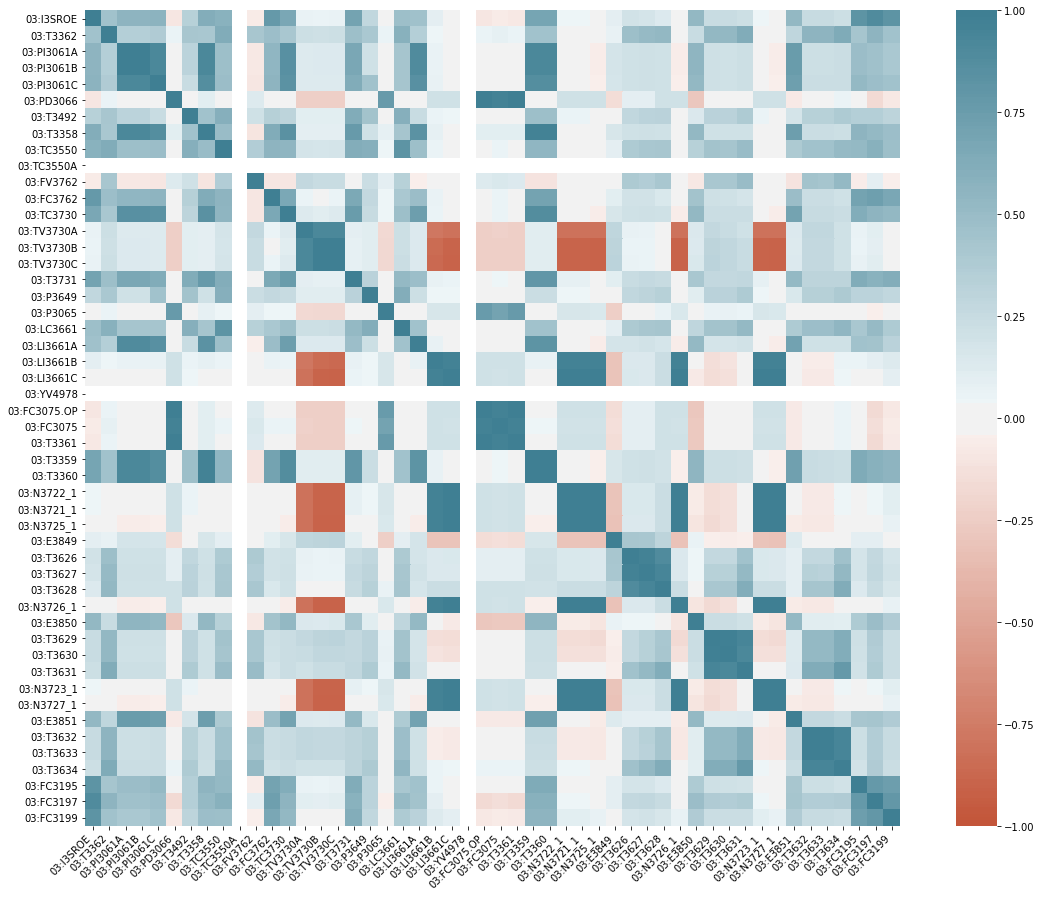

In [53]:
#get correlations of each features in dataset
corr = df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Feature 0 : 03:I3SROE = 0.000375
Feature 1 : 03:T3362 = 0.001224
Feature 2 : 03:PI3061A = 0.000627
Feature 3 : 03:PI3061B = 0.000317
Feature 4 : 03:PI3061C = 0.001123
Feature 5 : 03:PD3066 = 0.000900
Feature 6 : 03:T3492 = 0.000620
Feature 7 : 03:T3358 = 0.000582
Feature 8 : 03:TC3550 = 0.001795
Feature 9 : 03:TC3550A = 0.001837
Feature 10 : 03:FV3762 = 0.212992
Feature 11 : 03:FC3762 = 0.001270
Feature 12 : 03:TC3730 = 0.000378
Feature 13 : 03:TV3730A = 0.001467
Feature 14 : 03:TV3730B = 0.001030
Feature 15 : 03:TV3730C = 0.000830
Feature 16 : 03:T3731 = 0.000900
Feature 17 : 03:P3649 = 0.000566
Feature 18 : 03:P3065 = 0.001240
Feature 19 : 03:LC3661 = 0.001141
Feature 20 : 03:LI3661A = 0.001331
Feature 21 : 03:LI3661B = 0.002121
Feature 22 : 03:LI3661C = 0.000439
Feature 23 : 03:YV4978 = 0.086807
Feature 24 : 03:FC3075.OP = 0.003363
Feature 25 : 03:FC3075 = 0.001575
Feature 26 : 03:T3361 = 0.005241
Feature 27 : 03:T3359 = 0.606588
Feature 28 : 03:T3360 = 0.000340
Feature 29 : 03:N372

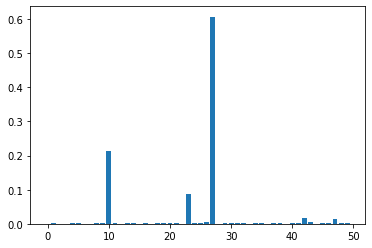

In [54]:
X, y = make_regression(n_samples=1000, n_features=50, n_informative=5, random_state=1)
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
i = 0
for col,score in zip(df.columns,model.feature_importances_):
    print('Feature %d : %s = %f' % (i,col,score))
    i=i+1
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [55]:
df['Durchsatz'] = df['03:FC3195'] + df['03:FC3197'] + df['03:FC3199']
df['Durchsatz']

0         1113.352
1         1114.411
2         1114.056
3         1114.888
4         1113.542
            ...   
574000     932.979
574001     933.390
574002     933.553
574003     932.625
574004     944.560
Name: Durchsatz, Length: 574005, dtype: float64

In [56]:
df_2019.shape

(70010, 54)

In [57]:
test = df.tail(70010)
test

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,Durchsatz
503995,919.871,78.452,2.690,2.705,2.720,-1001.0,37.096,91.536,112.032,NaN,...,1.0,1.0,29.802,57.056,56.971,41.973,371.995,371.908,411.160,1155.063
503996,920.013,78.423,2.687,2.702,2.716,-1001.0,36.995,91.557,112.017,NaN,...,1.0,1.0,29.808,56.879,56.804,41.743,371.951,371.881,411.499,1155.331
503997,920.155,78.394,2.684,2.698,2.712,-1001.0,36.950,91.551,112.003,NaN,...,1.0,1.0,29.814,56.701,56.632,41.513,371.908,371.853,410.965,1154.726
503998,920.297,78.365,2.680,2.694,2.708,-1001.0,36.950,91.544,111.988,NaN,...,1.0,1.0,29.819,56.523,56.459,41.323,371.864,371.826,411.898,1155.588
503999,920.438,78.335,2.677,2.691,2.704,-1001.0,36.950,91.538,111.973,NaN,...,1.0,1.0,29.825,56.345,56.287,41.178,371.820,371.799,411.172,1154.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574000,749.978,73.522,2.690,2.694,2.685,-1001.0,34.695,95.794,117.678,NaN,...,1.0,1.0,27.437,46.087,46.059,33.254,299.815,300.258,332.906,932.979
574001,749.896,73.570,2.693,2.695,2.687,-1001.0,34.747,95.685,117.822,NaN,...,1.0,1.0,27.446,46.111,46.074,33.265,300.061,300.229,333.100,933.390
574002,750.080,73.618,2.696,2.697,2.689,-1001.0,34.727,95.474,117.725,NaN,...,1.0,1.0,27.514,46.102,46.124,33.300,300.168,300.264,333.121,933.553
574003,751.267,73.667,2.699,2.698,2.691,-1001.0,34.707,95.714,117.856,NaN,...,1.0,1.0,27.589,46.117,46.124,33.276,300.339,299.913,332.373,932.625


In [58]:
train = df
train.drop(df.tail(70010).index,inplace=True)
train

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,Durchsatz
0,890.187,77.923,3.025,3.043,3.055,-1001.0,40.456,97.602,120.306,NaN,...,0.0,1.0,0.156,16.620,16.661,13.997,358.322,362.520,392.510,1113.352
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,NaN,...,0.0,1.0,0.157,16.675,16.676,13.985,358.897,362.505,393.009,1114.411
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,NaN,...,0.0,1.0,0.158,16.711,16.726,14.020,358.984,362.305,392.767,1114.056
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,NaN,...,0.0,1.0,0.159,16.716,16.784,14.035,362.205,361.171,391.512,1114.888
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,NaN,...,0.0,1.0,0.160,16.750,16.815,14.065,361.954,360.852,390.736,1113.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503990,920.346,78.597,2.707,2.723,2.740,-1001.0,37.412,91.705,112.106,NaN,...,1.0,1.0,29.773,57.660,57.593,43.123,372.119,371.948,411.636,1155.703
503991,920.119,78.568,2.704,2.719,2.736,-1001.0,37.342,91.601,112.091,NaN,...,1.0,1.0,29.779,57.544,57.469,42.893,372.096,371.945,411.610,1155.651
503992,919.893,78.539,2.700,2.716,2.732,-1001.0,37.272,91.496,112.076,NaN,...,1.0,1.0,29.785,57.428,57.344,42.663,372.074,371.941,411.405,1155.420
503993,919.667,78.510,2.697,2.712,2.728,-1001.0,37.203,91.481,112.062,NaN,...,1.0,1.0,29.791,57.311,57.220,42.433,372.052,371.938,411.201,1155.191


In [59]:
df.shape

(503995, 51)

In [60]:
test = df
test.shape

(503995, 51)

In [64]:
train.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,Durchsatz
0,890.187,77.923,3.025,3.043,3.055,-1001.0,40.456,97.602,120.306,NaN,...,0.0,1.0,0.156,16.620,16.661,13.997,358.322,362.520,392.510,1113.352
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,NaN,...,0.0,1.0,0.157,16.675,16.676,13.985,358.897,362.505,393.009,1114.411
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,NaN,...,0.0,1.0,0.158,16.711,16.726,14.020,358.984,362.305,392.767,1114.056
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,NaN,...,0.0,1.0,0.159,16.716,16.784,14.035,362.205,361.171,391.512,1114.888
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,NaN,...,0.0,1.0,0.160,16.750,16.815,14.065,361.954,360.852,390.736,1113.542


In [65]:
test = test.drop(['03:FC3195'], axis = 1)
test = test.drop(['03:FC3197'], axis = 1)
test = test.drop(['03:FC3199'], axis = 1)

KeyError: "['03:FC3195'] not found in axis"

In [66]:
train = train.drop(['03:FC3195'], axis = 1)
train = train.drop(['03:FC3197'], axis = 1)
train = train.drop(['03:FC3199'], axis = 1)

In [67]:
test.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:T3629,03:T3630,03:T3631,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,Durchsatz
0,890.187,77.923,3.025,3.043,3.055,-1001.0,40.456,97.602,120.306,NaN,...,42.798,43.061,31.555,0.0,1.0,0.156,16.620,16.661,13.997,1113.352
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,NaN,...,42.860,43.125,31.590,0.0,1.0,0.157,16.675,16.676,13.985,1114.411
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,NaN,...,42.903,43.132,31.625,0.0,1.0,0.158,16.711,16.726,14.020,1114.056
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,NaN,...,42.917,43.146,31.660,0.0,1.0,0.159,16.716,16.784,14.035,1114.888
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,NaN,...,42.945,43.172,31.668,0.0,1.0,0.160,16.750,16.815,14.065,1113.542


In [68]:
test.isna().sum()
test = test.drop(['03:TC3550A'], axis = 1)
test = test.drop(['03:YV4978'], axis = 1)

In [69]:
test.dropna()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:FV3762,...,03:T3629,03:T3630,03:T3631,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,Durchsatz
0,890.187,77.923,3.025,3.043,3.055,-1001.0,40.456,97.602,120.306,45.113,...,42.798,43.061,31.555,0.0,1.0,0.156,16.620,16.661,13.997,1113.352
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,44.936,...,42.860,43.125,31.590,0.0,1.0,0.157,16.675,16.676,13.985,1114.411
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,44.697,...,42.903,43.132,31.625,0.0,1.0,0.158,16.711,16.726,14.020,1114.056
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,44.611,...,42.917,43.146,31.660,0.0,1.0,0.159,16.716,16.784,14.035,1114.888
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,44.707,...,42.945,43.172,31.668,0.0,1.0,0.160,16.750,16.815,14.065,1113.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503990,920.346,78.597,2.707,2.723,2.740,-1001.0,37.412,91.705,112.106,48.686,...,28.848,29.018,27.024,1.0,1.0,29.773,57.660,57.593,43.123,1155.703
503991,920.119,78.568,2.704,2.719,2.736,-1001.0,37.342,91.601,112.091,48.664,...,28.729,28.931,27.013,1.0,1.0,29.779,57.544,57.469,42.893,1155.651
503992,919.893,78.539,2.700,2.716,2.732,-1001.0,37.272,91.496,112.076,48.642,...,28.609,28.844,26.961,1.0,1.0,29.785,57.428,57.344,42.663,1155.420
503993,919.667,78.510,2.697,2.712,2.728,-1001.0,37.203,91.481,112.062,48.620,...,28.489,28.757,26.887,1.0,1.0,29.791,57.311,57.220,42.433,1155.191


In [70]:
train.isna().sum()
train = train.drop(['03:TC3550A'], axis = 1)
train = train.drop(['03:YV4978'], axis = 1)

In [71]:
train.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:FV3762,...,03:T3629,03:T3630,03:T3631,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,Durchsatz
0,890.187,77.923,3.025,3.043,3.055,-1001.0,40.456,97.602,120.306,45.113,...,42.798,43.061,31.555,0.0,1.0,0.156,16.620,16.661,13.997,1113.352
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,44.936,...,42.860,43.125,31.590,0.0,1.0,0.157,16.675,16.676,13.985,1114.411
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,44.697,...,42.903,43.132,31.625,0.0,1.0,0.158,16.711,16.726,14.020,1114.056
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,44.611,...,42.917,43.146,31.660,0.0,1.0,0.159,16.716,16.784,14.035,1114.888
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,44.707,...,42.945,43.172,31.668,0.0,1.0,0.160,16.750,16.815,14.065,1113.542


In [80]:
train_X = train.drop(['Durchsatz'], axis = 1)
train_y = train['Durchsatz']
test_X = test.drop(['Durchsatz'], axis = 1)
test_y = test['Durchsatz']

In [73]:
train_X.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:FV3762,...,03:E3850,03:T3629,03:T3630,03:T3631,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634
0,890.187,77.923,3.025,3.043,3.055,-1001.0,40.456,97.602,120.306,45.113,...,29.751,42.798,43.061,31.555,0.0,1.0,0.156,16.620,16.661,13.997
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,44.936,...,29.558,42.860,43.125,31.590,0.0,1.0,0.157,16.675,16.676,13.985
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,44.697,...,29.579,42.903,43.132,31.625,0.0,1.0,0.158,16.711,16.726,14.020
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,44.611,...,29.501,42.917,43.146,31.660,0.0,1.0,0.159,16.716,16.784,14.035
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,44.707,...,29.651,42.945,43.172,31.668,0.0,1.0,0.160,16.750,16.815,14.065


In [91]:
train_X.dropna(inplace=True)
train_y.dropna(inplace=True)
test_X.dropna(inplace=True)
test_y.dropna(inplace=True)

In [93]:
train_X.shape

(503986, 45)

In [95]:
train_y.shape

(503986,)

In [96]:
test_X.shape

(503986, 45)

In [97]:
test_y.shape

(503986,)

Coefficients: 
 [ 1.46286556e+00  7.10833096e-01 -1.31526984e+01  1.20996854e+01
 -1.03017243e-01 -2.81192434e+00 -3.57210424e-01 -8.72626229e-03
 -4.60906515e-01  8.23815580e-02  5.49632502e-03  3.41162083e-01
 -3.46094431e-01 -5.57581105e-01  9.89788639e-01  3.80621109e-01
  7.32504293e-01  7.15844909e-02 -4.04433886e-01  5.59598244e-01
 -2.07595266e-02  6.92062812e-02  1.88344960e+00 -1.50479980e-01
  7.60611489e-01  8.89476105e-01  1.29574112e-02 -4.07252592e-01
  2.35507050e-01 -1.14315337e+01 -5.02578817e-02 -6.93390229e-01
  1.33644301e+00  2.38899913e-01 -2.63339004e+01 -1.97878819e-01
  1.68841116e+00 -4.33723420e-01 -1.78526087e+00 -4.31983877e-01
  3.83434753e+01 -2.70116970e-01 -5.20240715e-01  1.84750809e+00
 -1.36078208e+00]
Mean squared error: 12393.75
Coefficient of determination: 0.87


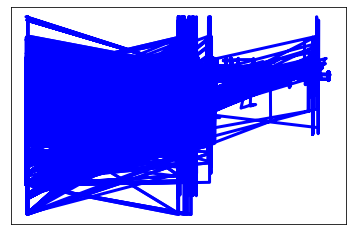

In [98]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
y_pred = regr.predict(train_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, y_pred))

# Plot outputs
#plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()